In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from xgboost import plot_importance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import pickle
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("/home/hybrid/final_dataset.csv",index_col=0,low_memory=False)

In [10]:
train.shape

(12794627, 84)

In [11]:
from sklearn import preprocessing 
for f in train.columns: 
    if train[f].dtype=='object': 
        label = preprocessing.LabelEncoder() 
        label.fit(list(train[f].values)) 
        train[f] = lbl.transform(list(train[f].values))

train.fillna((-999), inplace=True) 
train=np.array(train) 
train = train.astype(float) 

In [13]:
Y = train['Label']
X = train.drop("Label",axis=1)

In [14]:
print(train.shape)
print(X.shape)
print(Y.shape)

(12794627, 84)
(12794627, 83)
(12794627,)


In [15]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8572400, 83)
(8572400,)
(4222227, 83)
(4222227,)


In [17]:
%%time
model = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=0,n_jobs=-1)
model.fit(X_train, y_train)

CPU times: user 41min 41s, sys: 52.6 s, total: 42min 34s
Wall time: 1min 52s


In [19]:
print(model)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [ ]:
y_pred = model.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:",accuracy)
f1score=f1_score(y_test, y_pred)
print("f1-acore:",f1score)
cm=confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred)
print("Precision:",pr)
rs=recall_score(y_test,y_pred)
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.99959405309094
f1-acore: 0.9995987160787492
confusion matrix:
 [[2085725     736]
 [    978 2134788]]
Precision: 0.9996553539084553
Recall_score: 0.9995420846665787
Misclassified : 1714


In [50]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances[0:10]

,importance
Flow ID,0.226904
Src IP,0.105322
Fwd Seg Size Min,0.094147
Dst IP,0.090014
Timestamp,0.056993
Init Bwd Win Byts,0.050132
Init Fwd Win Byts,0.034673
Bwd Header Len,0.019799
Fwd Act Data Pkts,0.017990
Fwd Seg Size Avg,0.017863


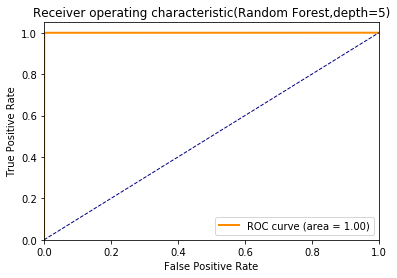

In [52]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(Random Forest,depth=5)')
plt.legend(loc="lower right")
plt.show()